## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

### **APP ENGAGEMENT AND SUCCESS FACTORS**


**What Is App Engagement?**



**App engagement is defined by a set of metrics that measure user interaction with an app. Common engagement metrics can include how many times a user opens the app, the duration of a usage session, and what actions a user takes within an app.**


Now we have the basic idea that app engagement is nothing but measure of usage of application


Now the question arises how to measure it?

The factors that are can be used to for evaluating are Number of downloads,Total number of users (new and old),Active app users,Session interval,Session length,Time in the app,Screen flow,Retention,Conversation.


- As we have some of these factors responsible for app engagement in the provided data i.e.

- **Number of downloads:**
To achieve app engagement, the very first step is reaching a substantially large number of downloads. This is considered the most important metric for measuring the user engagement since the vital objective is to consolidate a broad user base.


- **Retension:**
If there are any actionable features in your app like signing up, making a transaction, filling a form, giving a review, etc you’ll want to measure how many users are getting converted to goal target.



- **After observing the User review data:**

- **Conversation** a.k.a. **User review data Sentiments** can further be classified in two subcatogories : Polarity and Subjectivity





### Understanding the problem statement/ Business problem:
There are two datasets given that is the play store data obtained from the website and the user reviews data based on the app engagement of the users or customers using it. 

Many variables are given which affects the growth and sustainability of the apps. Based on all the features it is required to find out which factors would help us in predicting the success rate and helps in building the app engagemnt and user interaction with app so that the app and play store business grows.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


#### **Viewing the datasets for analysis**

In [3]:
Store_df=pd.read_csv('/content/drive/MyDrive/DataScience/Play Store Analysis(EDA)/Play Store Data.csv')

In [4]:
Store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
Users_df=pd.read_csv('/content/drive/MyDrive/DataScience/Play Store Analysis(EDA)/User Reviews.csv')

In [6]:
Users_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
Store_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [8]:
Store_df['Type'].replace('0','Free',inplace=True)

## **Exploratory Data Anlaysis(EDA)**

In [9]:
#Knowing the shape of the datasets
print(Store_df.shape)
print(Users_df.shape)

(10841, 13)
(64295, 5)


In [10]:
Store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
Store_df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [13]:
Store_df.replace(19.0,np.nan,inplace=True)

In [14]:
# The different categories of apps present in Play Store data
Store_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [15]:
# The Category '1.9' is not a good category and rating '19.0' are not correct values for the respective columns so coverting it to null values 
Store_df[Store_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,NaN,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
Store_df['Category'].replace('1.9',np.nan, inplace = True)

In [17]:
Store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [18]:
# The Category 'Everyone' is not a correct price value and it has to be in Content Rating
Store_df[Store_df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,NaN,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
Store_df['Price'].replace('Everyone',np.nan,inplace=True)

In [20]:
Store_df[Store_df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
# To fill the nan value in Content Rate with EVeryone as it mistakenly is present in Price column and price value is missing in that row 10472
Store_df['Content Rating'].replace(np.nan,'Everyone',inplace=True)

In [22]:
Store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [23]:
Store_df['Installs'].replace("Free",np.nan,inplace=True)

In [24]:
Store_df['Reviews'].replace('3.0M',np.nan,inplace=True)

In [25]:
Store_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [26]:
Store_df[Store_df['Last Updated']=='1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,NaN,NaN,"1,000+",NaN,Free,NaN,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
Store_df['Last Updated'].replace('1.0.19',np.nan,inplace=True)

### **Missing value Analysis**

In [28]:
# Finding missing values in Play Store data
Store_df.isnull().sum()

App                  0
Category             1
Rating            1475
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       0
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [29]:
# The loop to find the count of the same and different apps present in User Reviews dataset and Play Store dataset
count=0
count1=0
for i in Users_df['App'].unique():
   if i in Store_df['App'].unique():
     count=count+1
   else:
     count1=count1+1
   #print(count1)

In [30]:
# Different apps present in User Reviews dataset than in Play Store data
count1

54

In [31]:
# The count of same apps present in User Reviews dataset and Play Store dataset 
count

1020

In [32]:
rating_nan = (Store_df['Rating'].isnull().sum()/len(Store_df))*100
print(f'The percentage of missing values in Rating are {round(rating_nan,3)}%')

The percentage of missing values in Rating are 13.606%


In [33]:
#percentage of missing values in the dataset
nan_percentage = (Store_df.isnull().sum()/len(Store_df))*100
nan_percentage

App                0.000000
Category           0.009224
Rating            13.605756
Reviews            0.009224
Size               0.000000
Installs           0.009224
Type               0.009224
Price              0.009224
Content Rating     0.000000
Genres             0.000000
Last Updated       0.009224
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

- There are missing values in Rating,Type, Content Rating, Current Version and Android version. There are more missing values in Rating than any other feature. The percentage of missing values are highest in Rating. So, to avoid loss of information we are imputing the missing values using Systematic Random sampling.

One of the method that can be used for missing value imputation is Systematic Random Sampling;

**Systematic Random Sampling Imputation**

This method involves substituting the missing values with values extracted from the original variable. It can be applied to both numerical and categorical variables. It’s also used when the values are missing at random.

The idea here is to replace the population of missing values with a population of the original variables with the same distribution. Therefore, the variance and distribution of the variable are preserved.

(https://heartbeat.fritz.ai/data-handling-scenarios-part-2-working-with-missing-values-in-a-dataset-34b758cfc9fa)

In [34]:
# Defining a function to impute our missing values 

def randomiseMissingData(df2):
  "randomise missing data for DataFrame (within a column)"
  df = df2.copy()
  for col in df.columns:
    data = df[col]
    mask = data.isnull()
    samples = np.random.choice( data[~mask].values)
    data[mask] = samples

  return df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


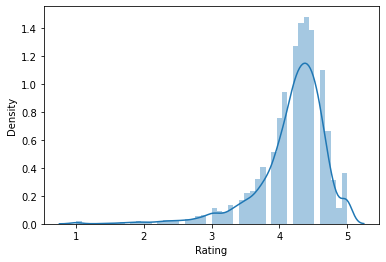

In [35]:
#Before imputation in rating
sns.distplot(Store_df['Rating']);

In [36]:
print("Skewness: %f" % Store_df['Rating'].skew())
print("Kurtosis: %f" % Store_df['Rating'].kurt())

Skewness: -1.849695
Kurtosis: 5.786924


- It looks like Rating variable is not completely normally distributed and is left skewed(negatively skewed) and value of skewness is -1.849695 which shows comes under moderately skewed distribution. The peakedness or kurtosis is little higher than normal value as kurtosis > 3 which means graph is leptokurtic or leptokurtotic(Extra kurtosis).

In [37]:
Store_df=randomiseMissingData(Store_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [38]:
Store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [39]:
Store_df.shape

(10841, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


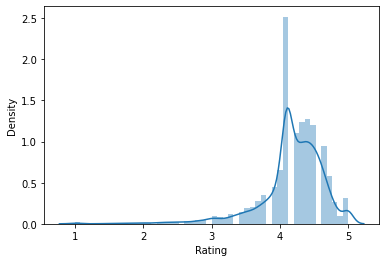

In [40]:
# After imputation rating plot
sns.distplot(Store_df['Rating']);

In [41]:
print("Skewness: %f" % Store_df['Rating'].skew())
print("Kurtosis: %f" % Store_df['Rating'].kurt())

Skewness: -1.900043
Kurtosis: 6.881382


- It can be observed that the skewness and kurtosis has increased and the distribution is still left-tail distribution and kurtosis is little higher than the normal. 
- Now there are no missing values in the data and it can be used for next level processing.

In [42]:
Users_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [43]:
# The missing value rows in User Reviews dataset
missing_users=Users_df[(Users_df['Translated_Review'].isnull())|(Users_df['Sentiment'].isnull())|(Users_df['Sentiment_Polarity'].isnull())|(Users_df['Sentiment_Subjectivity'].isnull())]

In [44]:
missing_users.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [45]:
Users_df.dropna(axis=0,inplace=True)

In [46]:
Users_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [47]:
Users_df.reset_index(drop=True,inplace=True)

In [48]:
Users_df.tail(1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
37426,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.4


- Missing values has to be either dropped or imputed using Statistical techniques like mean,median,mode or by KNNImputation... or by using the domain knowledge.
- In Play Store data there are app. 2000 missing values in which app. 1500 missing data is in Ratings. I have used Systematic Random Sampling imputation for imputing missing values for Play Store data.
- In User Reviews data there are 26868 rows of missing values out of 64295 of total data. These 26868 rows contain all the missing values except the movie name. So, there is no information of Users in the missing rows of User reviews. Hence, I have dropped that data. 

## **Data Cleaning and Analysis**
### *1. Play Store Data wrangling and analysis*

In [49]:
#Viewing last 5 rows in play store data
Store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.1,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [50]:
Store_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

- It seems the datatypes for the features in the data are not correct like Price cannot be a string column. It has to be numeric. So the datatypes need to be converted to the respective types

In [51]:
#Checking the rows with price not equal to 0 i,..e, find out the paid apps
Store_df[(Store_df['Price']!='0')].shape

(800, 13)

- There are a total of only 800 paid apps. 

In [52]:
# Converting the datatype of price to float after removing $ from it
Store_df['Price'] = Store_df.Price.str.replace("$","").astype(float)

In [53]:
# Converting Installs column to int after removing + and , from it
Store_df['Installs'] = Store_df.Installs.str.replace(",","")
Store_df['Installs'] = Store_df.Installs.str.replace("+","")

In [54]:
Store_df['Installs']=Store_df['Installs'].astype('int32')

In [55]:
# Renaming the price and Installs columns
Store_df.rename(columns={'Price':'Price($)','Installs':'Installs(+)'},inplace=True)

In [56]:
Store_df['Reviews']=Store_df['Reviews'].astype('int32')

In [57]:
Store_df['Reviews'][10472]

85

In [58]:
Store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [59]:
Store_df[Store_df['Size']=='1,000+']

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,FAMILY,4.1,85,"1,000+",5000,Free,0.0,Everyone,"February 11, 2018","November 9, 2015",4.0 and up,4.1 and up


In [60]:
Store_df['Size'].replace('1,000+','1k',inplace=True)

In [61]:
# Creating a new column for storing the units of size MB or KB or some other and converting existing size to
          #numeric column
Size_store=[]
for i in range(0,10841):
  if 'M' in Store_df['Size'][i]:
    Size_store.append('MB')
  elif 'K' in Store_df['Size'][i]:
    Size_store.append('KB')
  elif 'k' in Store_df['Size'][i]:
    Size_store.append('KB')
  elif 'm' in Store_df['Size'][i]:
    Size_store.append('MB')
  elif 'Varies with device' in Store_df['Size'][i]:
    Size_store.append('Varies with device')
  else:
    print('Some other size')
    Size_store.append('0')

In [62]:
#Creating new size units columns for knowing its whether size is in MB or KB
Store_df['Size(MB,KB)']=Size_store

In [63]:
named_size_df=Store_df[(Store_df['Size(MB,KB)']=='Varies with device')|(Store_df['Size(MB,KB)']=='MB')|(Store_df['Size(MB,KB)']=='KB')]

In [64]:
# Checking whether all the values have been obtained to the new column as both dataframe rows match. 
print(named_size_df.shape)
print(Store_df.shape)

(10841, 14)
(10841, 14)


In [65]:
Store_df['Size'][Store_df['Size']=='Varies with device']=Store_df['Size'].replace('Varies with device','11.5M',inplace=True) # 11.5 is the average size of android apps 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
given_size_data=Store_df['Size'].tolist()

In [67]:
Store_df['Size(Values as given)']=given_size_data

In [68]:
given_size_data

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '19M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '14M',
 '12M',
 '4.2M',
 '7.0M',
 '23M',
 '6.0M',
 '25M',
 '6.1M',
 '4.6M',
 '4.2M',
 '9.2M',
 '5.2M',
 '11M',
 '11M',
 '4.2M',
 '9.2M',
 '24M',
 '11.5M',
 '11M',
 '9.4M',
 '15M',
 '10M',
 '11.5M',
 '1.2M',
 '12M',
 '24M',
 '26M',
 '8.0M',
 '7.9M',
 '25M',
 '56M',
 '57M',
 '11.5M',
 '35M',
 '33M',
 '33M',
 '5.6M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '17M',
 '8.6M',
 '2.4M',
 '27M',
 '2.7M',
 '2.5M',
 '11.5M',
 '11.5M',
 '7.0M',
 '35M',
 '16M',
 '16M',
 '11.5M',
 '17M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '37M',
 '15M',
 '5.4M',
 '18M',
 '11.5M',
 '38M',
 '1.1M',
 '11.5M',
 '11.5M',
 '7.9M',
 '35M',
 '11.5M',
 '17M',
 '19M',
 '14M',
 '2.2M',
 '4.5M',
 '17M',
 '14M',
 '9.8M',
 '21M',
 '11.5M',
 '52M',
 '14M',
 '25M',
 '9.0M',
 '11.5M',
 '12M',
 '11.5M',
 '35M',
 '6.7M',
 '30M',
 '5.7M',
 '2.9M',
 '17M',
 '2

In [69]:
#Store_df['Size(Values as given)']=given_size_data

In [70]:
# Extracting only numeric data to Size columns and converting it to numeric datatype
for i in range(0,10841):
  if 'M' in Store_df['Size(Values as given)'][i]:
    Store_df['Size(Values as given)'][i]=Store_df['Size(Values as given)'][i].split('M')[0]
  elif 'K' in Store_df['Size(Values as given)'][i]:
    Store_df['Size(Values as given)'][i]=Store_df['Size(Values as given)'][i].split('K')[0]
  elif 'k' in Store_df['Size(Values as given)'][i]:
    Store_df['Size(Values as given)'][i]=Store_df['Size(Values as given)'][i].split('k')[0]
  elif 'm' in Store_df['Size(Values as given)'][i]:
    Store_df['Size(Values as given)'][i]=Store_df['Size(Values as given)'][i].split('m')[0]
  #elif 'Varies with device' in Store_df['Size(Values as given)'][i]:
   # Store_df['Size(Values as given)'][i]='11.5'#the average app size of android apps
  else:
    print('Some other size')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
Store_df['Size(Values as given)']=Store_df['Size(Values as given)'].astype(float)

In [72]:
Store_df.head(3)

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,"Size(MB,KB)",Size(Values as given)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,MB,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,MB,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,MB,8.7


In [73]:
float(Store_df['Size'][0][:-1])*5

95.0

In [74]:
Store_df['Size'][~Store_df['Size'].isna()] = Store_df['Size'][~Store_df['Size'].isna()].apply(lambda x: float(x[:-1])*1024 if "M" in x else float(x[:-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
Store_df['Size']=Store_df['Size'].astype(float)

In [76]:
Store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs(+)                int32
Type                      object
Price($)                 float64
Content Rating            object
Genres                    object
Last Updated              object
Current Ver               object
Android Ver               object
Size(MB,KB)               object
Size(Values as given)    float64
dtype: object

In [77]:
# Extracting date,month and year from last updated date for the android apps
Store_df['Last Updated']=pd.to_datetime(Store_df['Last Updated'])
Store_df['Last_updated_month']=Store_df['Last Updated'].dt.month
Store_df['Last_updated_Year']=Store_df['Last Updated'].dt.year
Store_df['Last_updated_day']=Store_df['Last Updated'].dt.day
Store_df['Last_updated_quarter']=Store_df['Last Updated'].dt.quarter
Store_df.drop(columns=['Last Updated'],axis=1,inplace=True)

In [78]:
# Converting the data to useful format and datatypes
Store_df['Last_updated_month']=Store_df['Last_updated_month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',\
                                                                   6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',\
                                                                   11:'Nov',12:'Dec'})
Store_df['Last_updated_month']=Store_df['Last_updated_month'].astype('object')
Store_df['Last_updated_Year']=Store_df['Last_updated_Year'].astype('object')
Store_df['Last_updated_quarter']=Store_df['Last_updated_quarter'].astype('object')
type(Store_df.Last_updated_month[0])

str

In [79]:
# Capitalizing the Category feature instead of keeping all its values in the upper case
Store_df['Category']=Store_df['Category'].str.capitalize()

In [80]:
Store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs(+)                int32
Type                      object
Price($)                 float64
Content Rating            object
Genres                    object
Current Ver               object
Android Ver               object
Size(MB,KB)               object
Size(Values as given)    float64
Last_updated_month        object
Last_updated_Year         object
Last_updated_day           int64
Last_updated_quarter      object
dtype: object

In [81]:
#Numeric variables
num_cols=['Rating', 'Reviews', 'Size', 'Installs(+)','Price($)', 'Last_updated_day','Size(Values as given)']
#Categorical variables
cat_cols=['App', 'Category','Type','Content Rating', 'Genres', 'Current Ver', 'Android Ver',\
          'Size(MB,KB)','Last_updated_month', 'Last_updated_Year','Last_updated_quarter']
# Numerical columns dataframe
Store_num_df=Store_df[num_cols]
# Categorical columns dataframe
Store_col_df=Store_df[cat_cols]

In [82]:
Store_col_df.tail(3)

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver,"Size(MB,KB)",Last_updated_month,Last_updated_Year,Last_updated_quarter
10838,Parkinson Exercices FR,Medical,Free,Everyone,Medical,1.0,2.2 and up,MB,Jan,2017,1
10839,The SCP Foundation DB fr nn5n,Books_and_reference,Free,Mature 17+,Books & Reference,Varies with device,Varies with device,Varies with device,Jan,2015,1
10840,iHoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,Free,Everyone,Lifestyle,Varies with device,Varies with device,MB,July,2018,3


In [83]:
Store_df.describe()

,Rating,Reviews,Size,Installs(+),Price($),Size(Values as given),Last_updated_day
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000,10841.000000,10841.000000
mean,4.179273,4.441119e+05,20426.899908,1.546291e+07,1.027273,33.039627,15.608431
std,0.479917,2.927629e+06,21569.790208,8.502557e+07,15.948971,91.283080,9.561390
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,4.100000,3.800000e+01,6041.600000,1.000000e+03,0.000000,6.800000,6.000000
50%,4.200000,2.094000e+03,11776.000000,1.000000e+05,0.000000,11.500000,16.000000
75%,4.500000,5.476800e+04,26624.000000,5.000000e+06,0.000000,28.000000,24.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,1020.000000,31.000000


In [84]:
# The new dataframe formed after all the data cleaning and 
Store_df.head(2)

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Current Ver,Android Ver,"Size(MB,KB)",Size(Values as given),Last_updated_month,Last_updated_Year,Last_updated_day,Last_updated_quarter
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_and_design,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,MB,19.0,Jan,2018,7,1
1,Coloring book moana,Art_and_design,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,MB,14.0,Jan,2018,15,1


### *2. User Reviews Data Cleaning and Analysis*
- There are 4 features which gives the information about user engagement with the android apps in the play store.
- Here there is data about the translated reviews given by the users, Sentiment polarity, Sentiment subjectivity and Sentiment for a given app.
- **Polarity** is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.
- **Subjectivity** generally refers to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
- For example, if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.
- Sentiment finally gives whether it is positive, negative or neutral statement/reviews for a given app.


In [85]:
# Last 5 rows of Users reviews dataset
Users_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
37426,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [86]:
Users_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [87]:
print(Users_df['Sentiment_Subjectivity'].max())
print(Users_df['Sentiment_Subjectivity'].min())

1.0
0.0


In [88]:
print(Users_df['Sentiment_Polarity'].max())
print(Users_df['Sentiment_Polarity'].min())

1.0
-1.0


In [89]:
Users_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


- From the above User reviews data it can be seen that Sentiment Polarity lies in the range -1 to +1, Sentiment subjectivity lies in the range of 0 to 1.
- The mean, median for Sentiment polarity is 0.1822,0.1500 respectively and for Sentiment subjectivity it is 0.4928,0.5143. The median value is higher in Sentiment subjectivity and mean value is higher for Sentiment polarity which says that there are more outliers in Sentiment polarity which are positively skewed than in subjectivity of User data reviews which is negatively skewed distribution. 
- There is not much difference between mean and median just a slight difference so it can also be said it is following Normal distribution.
- There is low standard deviation for Sentiment subjectivity than polarity indicating it is very close to mean compared to polarity variable.

### **Data Visualization**
### ***1. Univariate Analysis***

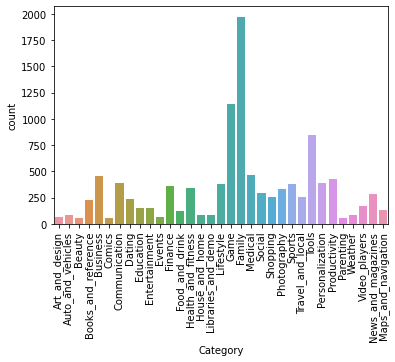

In [90]:
sns.countplot(x='Category',data=Store_df);
plt.xticks(rotation='vertical');

- There are more apps of Category 'Family' then 'Game' and next 'Tools'. These are the three category apps which are more in the Play Store data and occupy more space in Play Store. 
- The Family apps are app. 2000, Game apps app.1200 and Tools category apps are app.850. All the other apps of each category are less than 500.

In [91]:
Store_df[Store_df['Size']==0]

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Current Ver,Android Ver,"Size(MB,KB)",Size(Values as given),Last_updated_month,Last_updated_Year,Last_updated_day,Last_updated_quarter


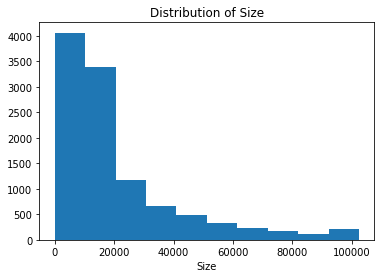

In [92]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(Store_df['Size']);
plt.show()

- Most of the app size is in between 0-20000 KB. There are even apps with greater size than normal. They require upto 1,00,000 KB which takes more space in a system.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


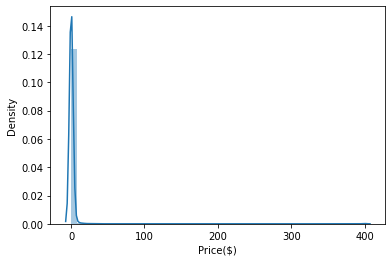

In [93]:
#histogram for price 
sns.distplot(Store_df['Price($)'],hist=True,kde=True)

In [94]:
#skewness and kurtosis
print("Skewness: %f" % Store_df['Price($)'].skew())
print("Kurtosis: %f" % Store_df['Price($)'].kurt())

Skewness: 23.708490
Kurtosis: 578.196704


- From the above dist plot it can be said that there are more free apps which require no money to purchase or install them. They are free to use and may be there are some clauses like after using for some period it has to be purchased or something. 
- There are even the costly apps which are more than 400$. Very costly!!!
- The skewness indicates it is right-tail distributed because of some costly apps present in the play store. The Kurtosis is much higher than the normal because of the peakedness or consistency of many free apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

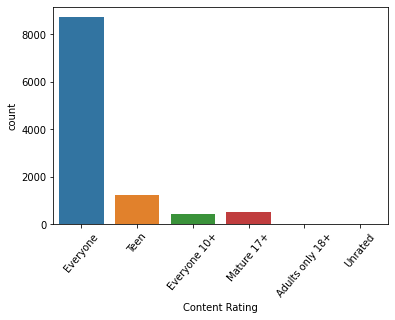

In [95]:
sns.countplot(Store_df['Content Rating'])
plt.xticks(rotation=50)

- There are 6 categories in content rating from which most of the apps come under the apps which can be used or rated as used by 'Everyone'. Next category of content rating apps are used by only 'Teen'. Next apps are rated as to be used by 'Mature 17+' followed by 'Everyone 10+'. There are very few apps in the left over category of content rating. They are 'Adults only 18+' and 'Unrated' categories.

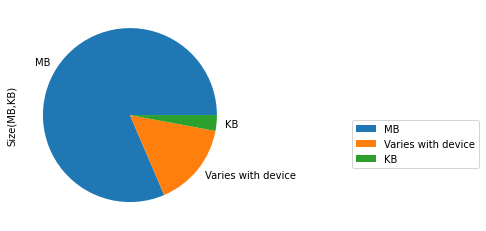

In [96]:
k=Store_df['Size(MB,KB)'].value_counts()
k.plot(kind='pie',figsize=(5,4),legend=True)
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

- There are more apps with size in MB than in KB. "You know most commonly found apps now-a-days are in GB.Yes, Right".
- From the data we have, it can also be seen that some apps are there in which size of the apps differs with the device in which it is being used. "Strange!".
- Mostly this varies with device apps come under MB category size

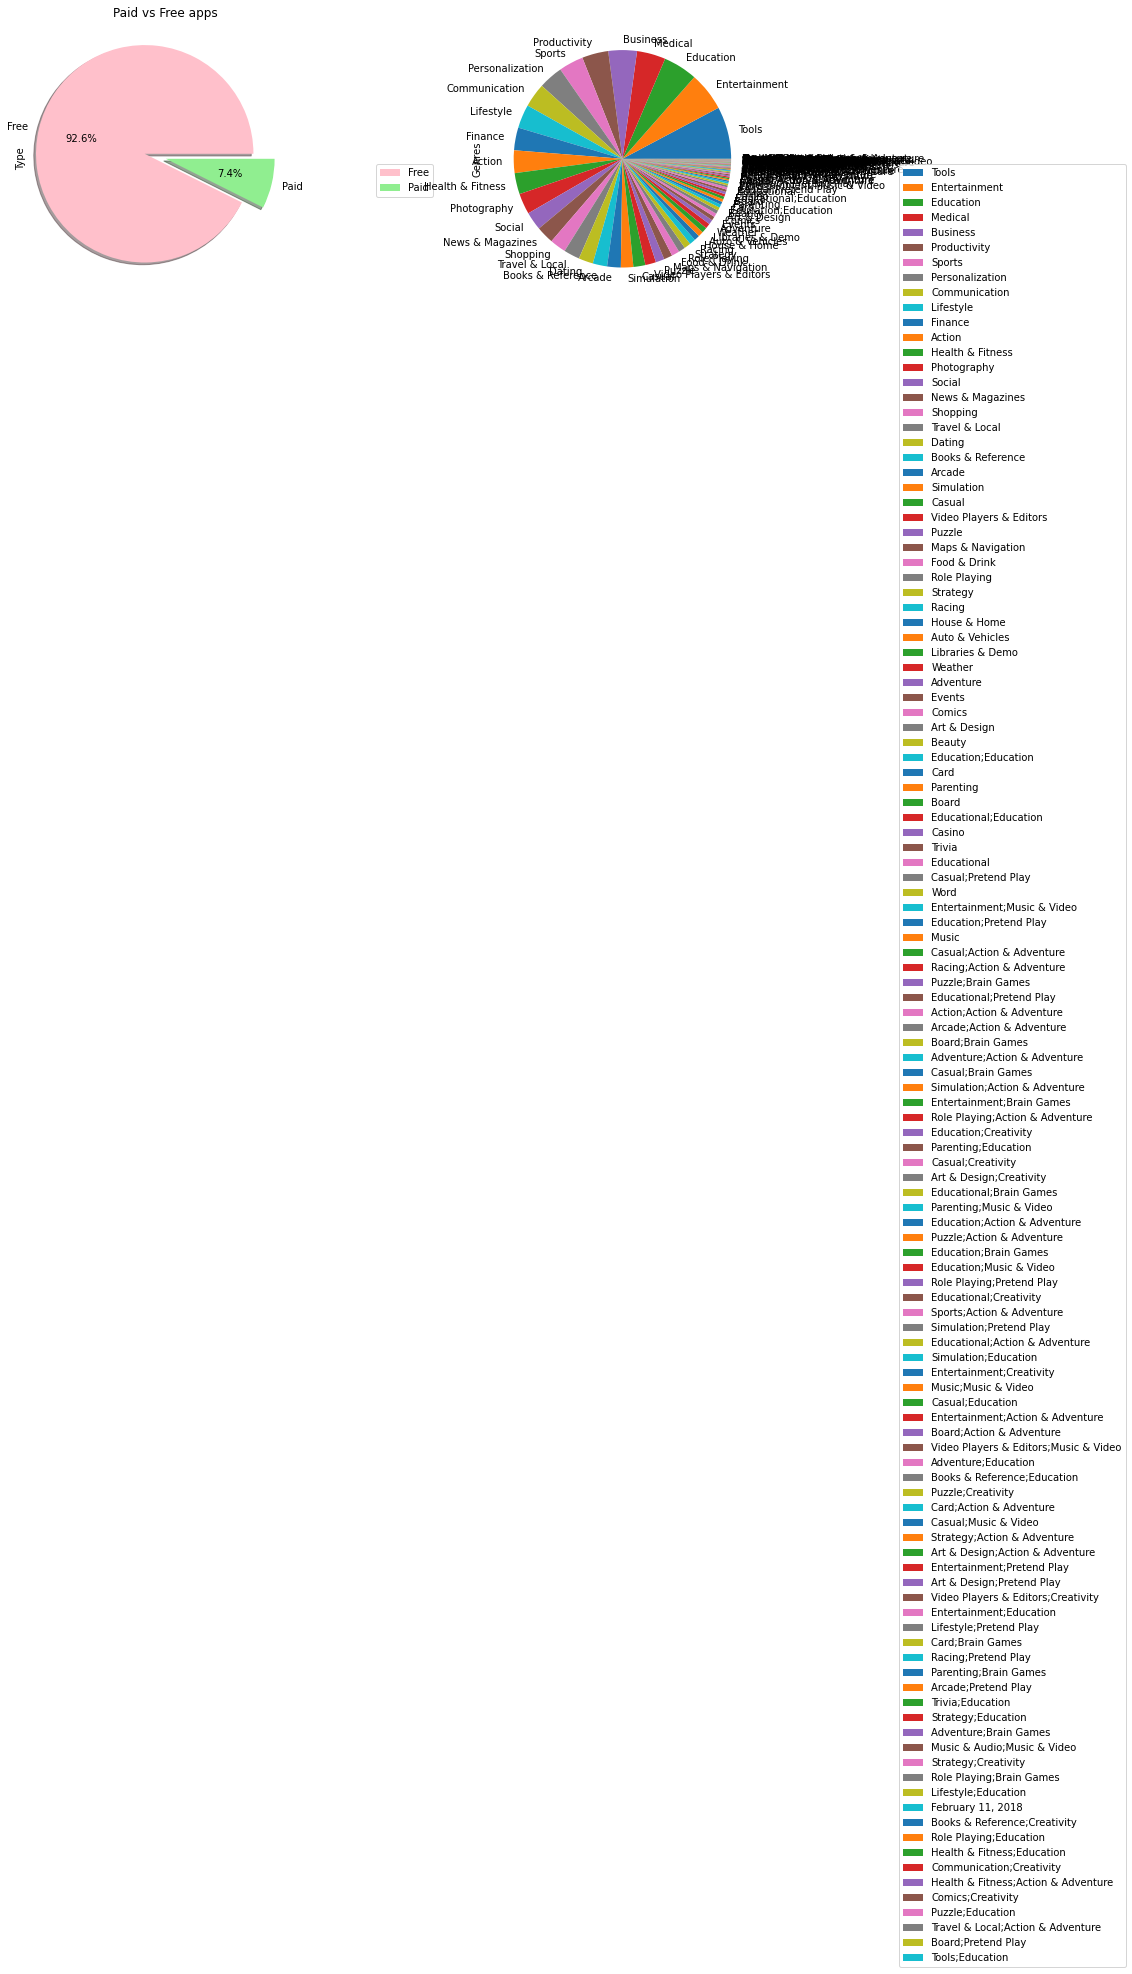

In [97]:
plt.subplot(1,2,1)
k=Store_df['Type'].value_counts(sort=True);
colors = ["pink","lightgreen"]
explode = (0.2,0)
k.plot(kind='pie',figsize=(15,5),legend=True,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,);
plt.title('Paid vs Free apps')
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));
plt.subplot(1,2,2);
k=Store_df['Genres'].value_counts();
k.plot(kind='pie',figsize=(15,5),legend=True);
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5));

- There are many genres in the Play Store data which are listed using some colors in the right side of the pie chart and you can clearly see some of the genres of the apps which are widely used in Play Store whereas are there are very fews genres apps which are in Play Store that cannot be properly seen and still they exist in few numbers in the play store. The most apps are of genres like Tools,Entertainment, Education, Action, Productivity, Sports, Communication , Finance, Photography, Lifestyle ..etc
- There are more free apps than paid apps. "Free of cost.That's good,Lets try some free apps".
- **There are 92.6% of free apps in the play store vs 7.4% of paid apps.**
- **There are more free apps than paid apps. So it is cost free so there are more chances for the common people and many people to install the apps easily and use it for their daily needs and other uses increases the app engagement by users which positively impacts the success rate of the apps in the Play store.**

Rating


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


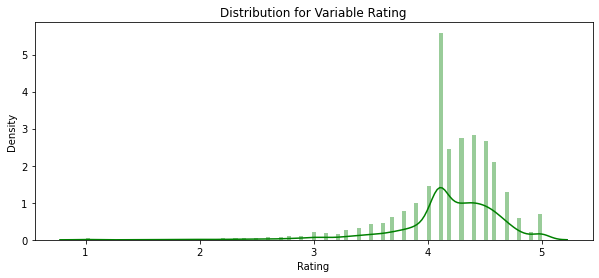

Reviews


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


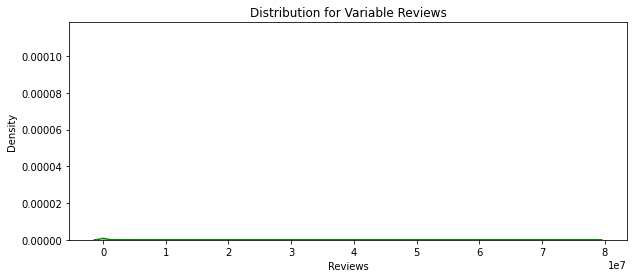

Size


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


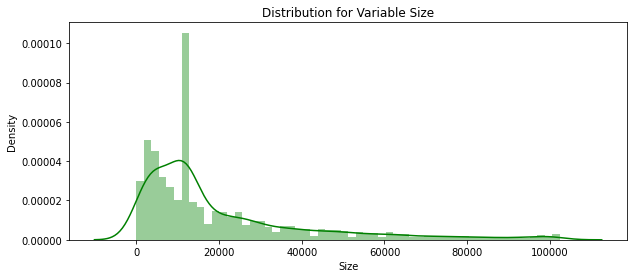

Installs(+)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


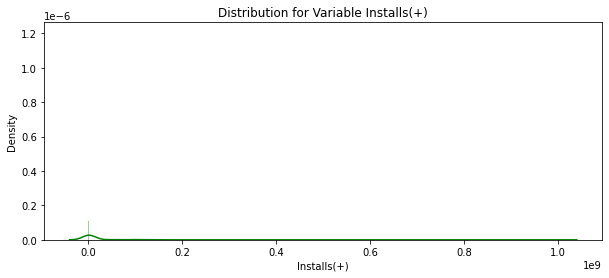

Price($)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


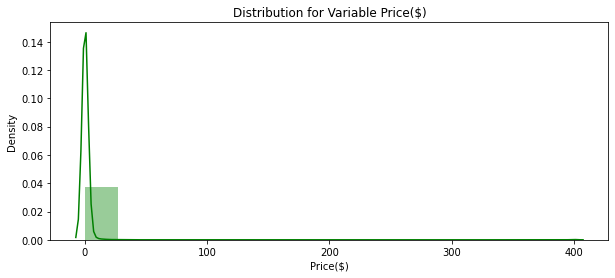

Size(Values as given)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


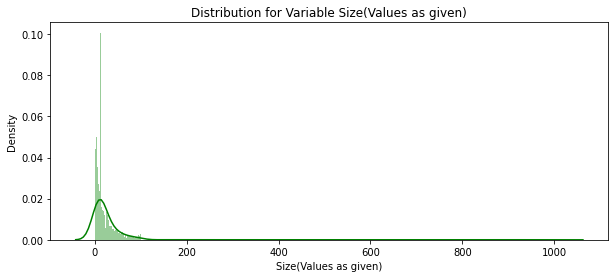

In [98]:
for i in Store_num_df.drop('Last_updated_day',axis=1).columns:
    print(i);
    plt.figure(figsize=(10,4));
    sns.distplot(Store_df[i],bins='auto',color='green');
    plt.title("Distribution for Variable "+i);
    plt.ylabel("Density");
    plt.show();

- The above are the displots of numerical columns where all are mostly the skewed distribution because of the outliers in the data and more values at one point.

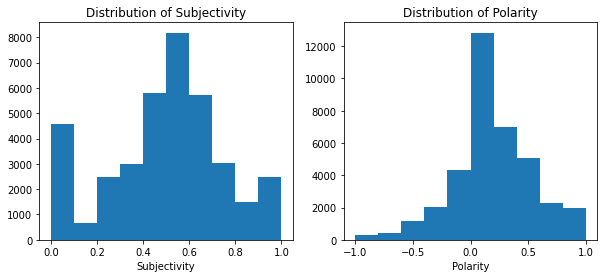

In [99]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(Users_df['Sentiment_Subjectivity'])
plt.subplot(1,2,2)
plt.xlabel("Polarity")
plt.title("Distribution of Polarity")
plt.hist(Users_df['Sentiment_Polarity'])
plt.show();

- From the User reviews data and from the plot it can be seen that subjectivity is between 0-1 and polarity is ranging from -1 to +1. It can also be seen that there is peakedness in the middle of the data for both subjectivity and polarity.

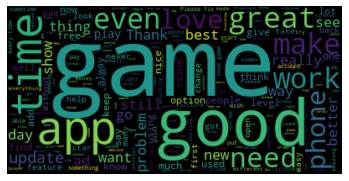

In [100]:
text = " ".join(review for review in Users_df['Translated_Review'])
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Word Cloud which is mostly used in NLP. As Translated Review some how comes under text analysis. Word Cloud gives a good display of the words which are more used in User Reviews dataframe
- From the above Word Cloud it can be seen that game size is bigger than any other, next comes good,app and so on. It can also be said that there are positive words can be seen which indicates there are lot of apps which are given positive reviews by the Users.
- **The most commonly used words from Users Translated reviews says that they have used more positive words to say about their app experience and which says it has good app engagement by its users. So this definitely talks about good user experience and good word of mouth increases the publicity for the app then it impacts the success rate of the respective apps.**

### ***2. Bivariate Analysis***

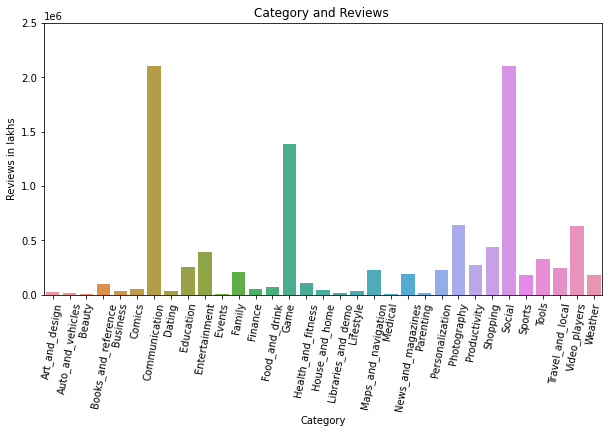

In [101]:
cat_review=Store_df.groupby('Category')['Reviews'].mean().reset_index()
cat_review['Reviews']=cat_review['Reviews'].round(decimals=2)
plt.figure(figsize=(10,5))
sns.barplot(x=cat_review['Category'], y=cat_review['Reviews'])
plt.ylim(0, 2500000)
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews in lakhs")
plt.title("Category and Reviews ")
plt.show()

- It can be seen from the above plot, the average number of reviews in each category and also it can be seen that the reviews are highest for Communication, Social and Game categories.
- Yes the category and reviews seem a good match with the existing app use too. Definitely those are priority apps even now. All the users of android mobile do install the communication(chat apps), Social(google, fb, snap..), Games first then go for Photography, Entertainment, Education and so on as present in this data and same for reviews to the respective categories. What are your category apps? Already here for analysis. 

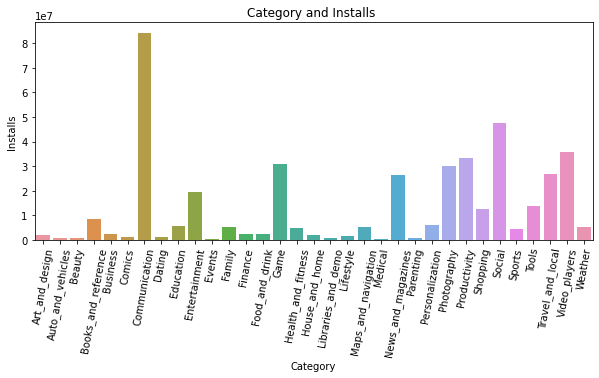

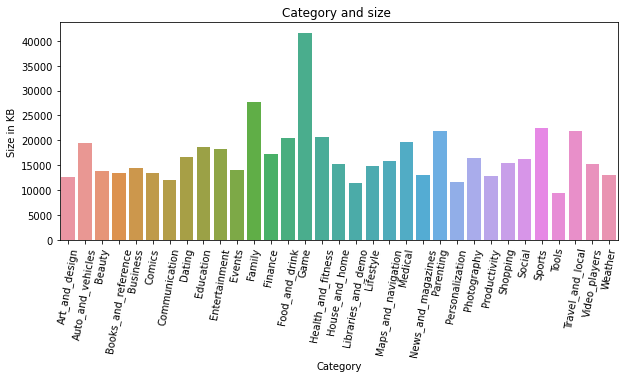

In [102]:
# CAT and Installs
plt.figure(figsize=(10,4))
cat_inst=Store_df.groupby('Category')['Installs(+)'].mean().reset_index()
cat_inst['Installs(+)']=cat_inst['Installs(+)'].round(decimals=2)
sns.barplot(x=cat_inst['Category'], y=cat_inst['Installs(+)'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category and Installs ")

# CAT and size
cat_size=Store_df.groupby('Category')['Size'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x=cat_size['Category'], y=cat_size['Size'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Size in KB")
plt.title("Category and size ")
plt.show()

- There are two plots here one is each category vs the average number of installations and second plot tells about each category apps and the average size of the apps for that particular category.
- It can be seen that average number of installations are high for Communication apps then Social followed by Game, Video players, photography (editing and good filter apps "Common"),News and magazines and, Travel etc.
- **According the installation there is high rate of app engagement with most commonly downloaded apps like communication apps. There is a high chance of success rate for these apps if there no other constraints** to stop using it.
- The Game category has high average size app. >40000 KB. So, this requires good space in the mobile to download. "Yes, Obviously because of its gaming features". All other apps size is very much less than this. **Even though game category requires good memory space, users are installing it which can be seen in the first plot. So, from this it can be said that there is good app enagagement and also there is a high chance for other apps also be used by the people because of its small size. So by this it can be said that success rate of the apps are good even though it is larger in size.**  

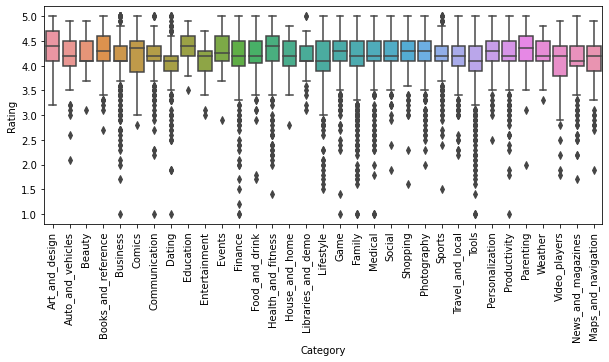

In [103]:
rating_box = pd.concat([Store_df['Rating'],Store_df['Category']],axis = 1)
plt.figure(figsize=(10,4))
sns.boxplot(x = 'Category',y = 'Rating', data = rating_box)
plt.xticks(rotation=90);

- It can be seen median of the ratings for all the app categories are greater than 4 and there are few users who have rated below 3. So by knowing the reviews and improving the apps features would help in increasing the app engagement. **Also by rating it can be said that this is a good sign for high success rate of an app.**

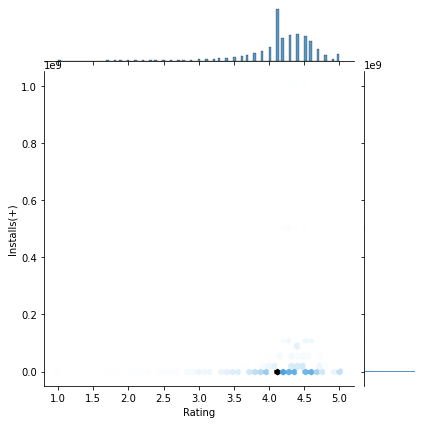

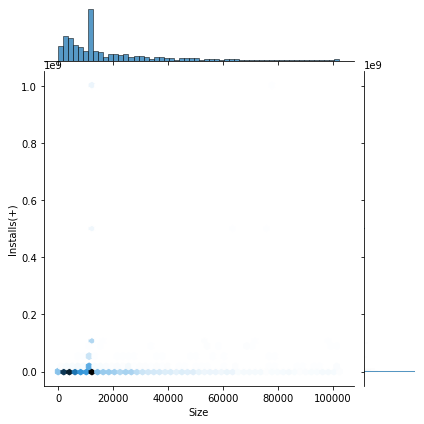

In [104]:
sns.jointplot(x = 'Rating',y = 'Installs(+)',data = Store_df,kind = 'hex')
sns.jointplot(x = 'Size',y = 'Installs(+)',data = Store_df,kind = 'hex')

- From the above it can be seen that **high rated apps have high number of installations increasing the success rate of an app.**
- When it comes to size the apps with less size has good installations with some exceptions to it. Like there are more installations with size in between 10000-20000 KB than 0-10000 KB. **So this is one factor which has to be noted and taken care of for increasing the app engagement and success rate of the play store apps.**

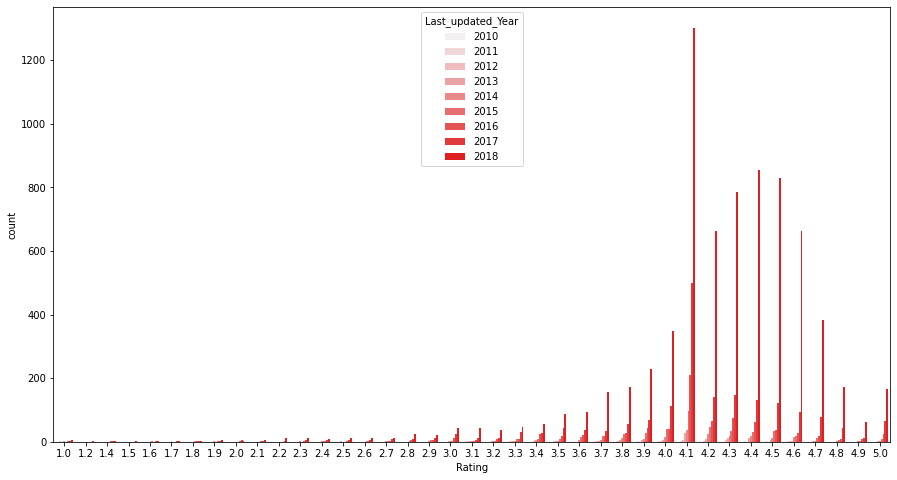

In [105]:
plt.figure(figsize=(15,8));
sns.countplot(x='Rating',hue='Last_updated_Year',data=Store_df,color='red');

- **There are more ratings in the year of 2018 than any other year indicating that the people have started increasing the use of apps from Play Store which says the business and app engagement has grown also the success rate has increased.**
- Most of the apps are rated 4.0-4.7 and there are more apps rated 4.4. There are very less apps rated below 3.7. The highest rating given is 5.0 and lowest being 1.0

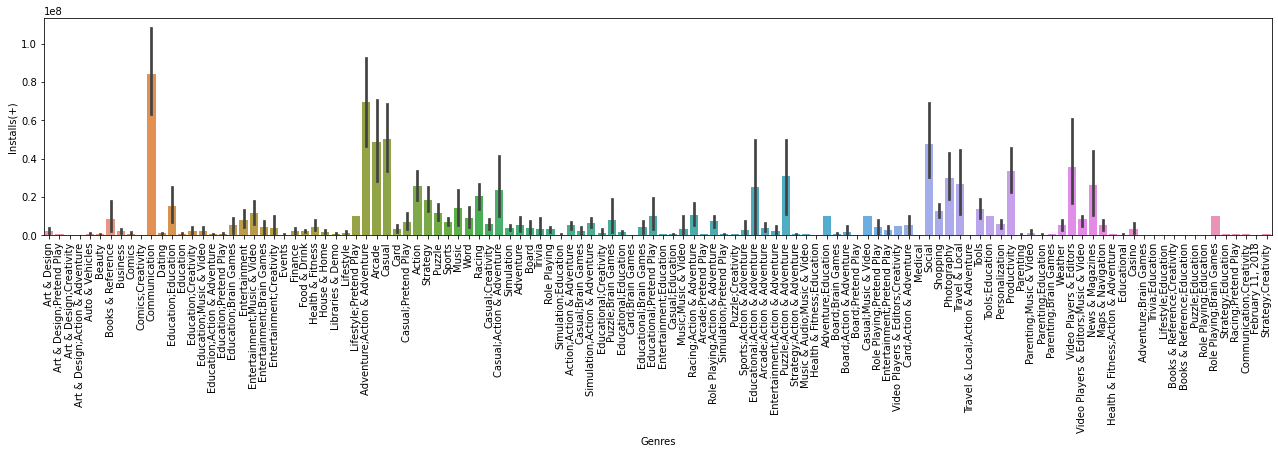

In [106]:
plt.figure(figsize=(22,4))
sns.barplot(x='Genres',y='Installs(+)',data=Store_df);
plt.xticks(rotation='vertical');

- From the genres and the number of downloads made, it can seen that the app that are downloaded are more from Communication genres, next Adventure and action genre followed by Arcade, Casual and Social genre apps.

In [107]:
merged_df = Store_df.merge(Users_df, on="App")
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count']) # Log transformed values for Sentiment count

In [108]:
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,Art_and_design,Negative,61,5.930737
1,Art_and_design,Neutral,62,5.954196
2,Art_and_design,Positive,259,8.016808
3,Auto_and_vehicles,Negative,17,4.087463
4,Auto_and_vehicles,Neutral,36,5.169925
...,...,...,...,...
94,Video_players,Neutral,58,5.857981
95,Video_players,Positive,190,7.569856
96,Weather,Negative,33,5.044394
97,Weather,Neutral,35,5.129283


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


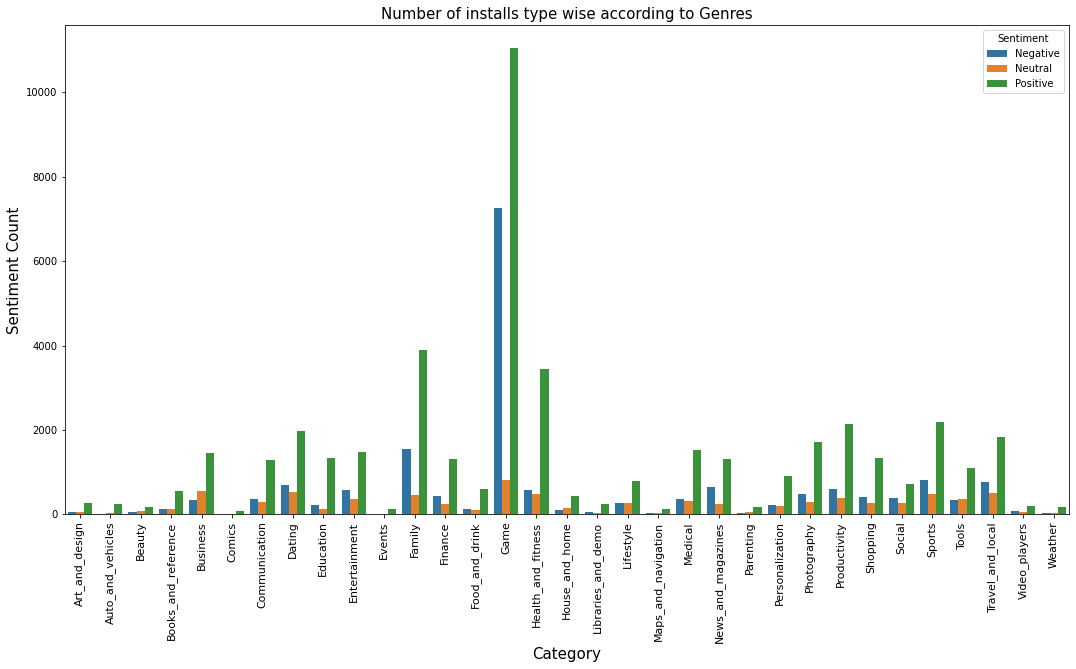

In [109]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment count of different apps on sentiment level(Positive,Negative,Neutral", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'Sentiment Count', hue='Sentiment', data=category_sentiment);

- There are a total of 33 category apps which are merged to Play store data from User reviews dataset. 
- Here the count for all the apps has been obtained for each level of sentiment categories(i,,e, positive, negative and neutral sentiment). It can be seen from the above plot that there are more positive and highest number of positive reviews in Game category then the negative and least number of neutral reviews among all the apps.
- The same trend has been continued for the all the apps. **Most of the apps have more positive reviews than negative and neutral reviews which says the apps businesses(Play store apps) are good and the success rate for the apps is also much higher eventhough there are some negative reviews in User reviews dataset with good app engagement features in the apps.**

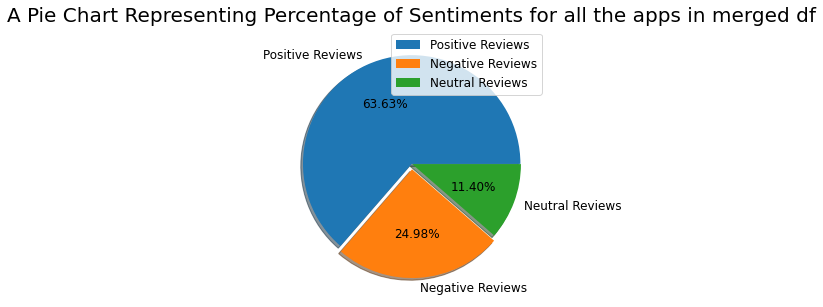

In [110]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in merged df', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

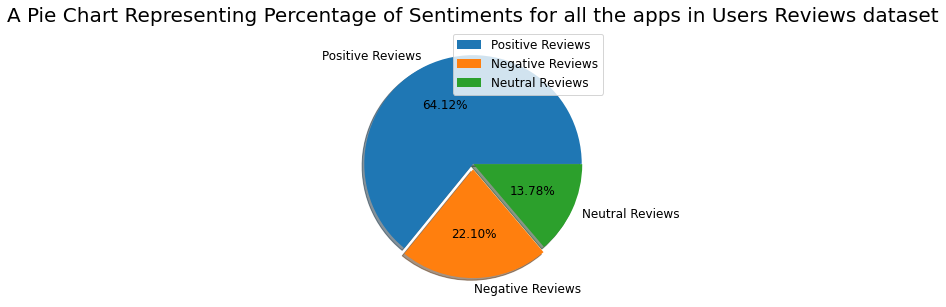

In [111]:
counts1 = list(Users_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts1, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in Users Reviews dataset', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

- Even both the pie charts obtained from the merged dataframe and the users sentiment dataset tells the same that there are more positive reviews for the apps than the negative and neutral reviews for the play store data.
- **This sentiment tells that there is a good user interaction with apps and good app engagement with the apps for the users. So, it has positive impact for the success of the apps in the play store.**

### ***3. Multivariate Analysis***

In [112]:
Store_df.describe()

,Rating,Reviews,Size,Installs(+),Price($),Size(Values as given),Last_updated_day
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000,10841.000000,10841.000000
mean,4.179273,4.441119e+05,20426.899908,1.546291e+07,1.027273,33.039627,15.608431
std,0.479917,2.927629e+06,21569.790208,8.502557e+07,15.948971,91.283080,9.561390
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,4.100000,3.800000e+01,6041.600000,1.000000e+03,0.000000,6.800000,6.000000
50%,4.200000,2.094000e+03,11776.000000,1.000000e+05,0.000000,11.500000,16.000000
75%,4.500000,5.476800e+04,26624.000000,5.000000e+06,0.000000,28.000000,24.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,1020.000000,31.000000


In [113]:
Users_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


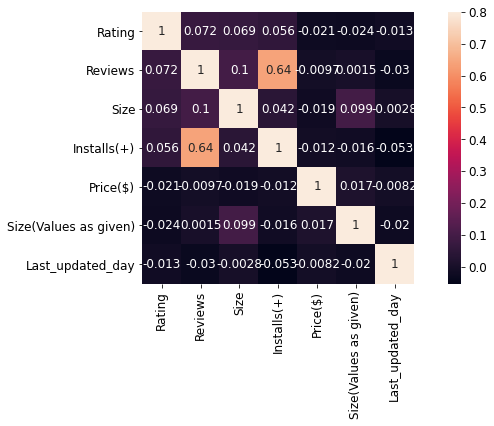

In [114]:
corrmat = Store_df.corr()
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corrmat, vmax=.8, square=True,annot = True)

- The correlation between Reviews and Installs is higher and they both are strongly correlated variables. Hence multicollinearity exists between these two features. 
- Size and Reviews are next correlated variables with correlation of 0.1.
- All the other variables are not much correlated with each other. Based on the requirement or predictor variable only uncorrelated variables are chosen and whichever is have good correlation with target are preferred.

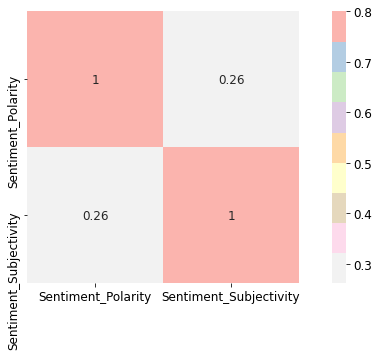

In [115]:
corrmat1 = Users_df.corr()
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corrmat1, vmax=.8, square=True,annot = True,cmap='Pastel1_r')

- Sentiment polarity and subjectivity have little correlation between them and it doesn't affect much as it doesn't have high multicollinearity.

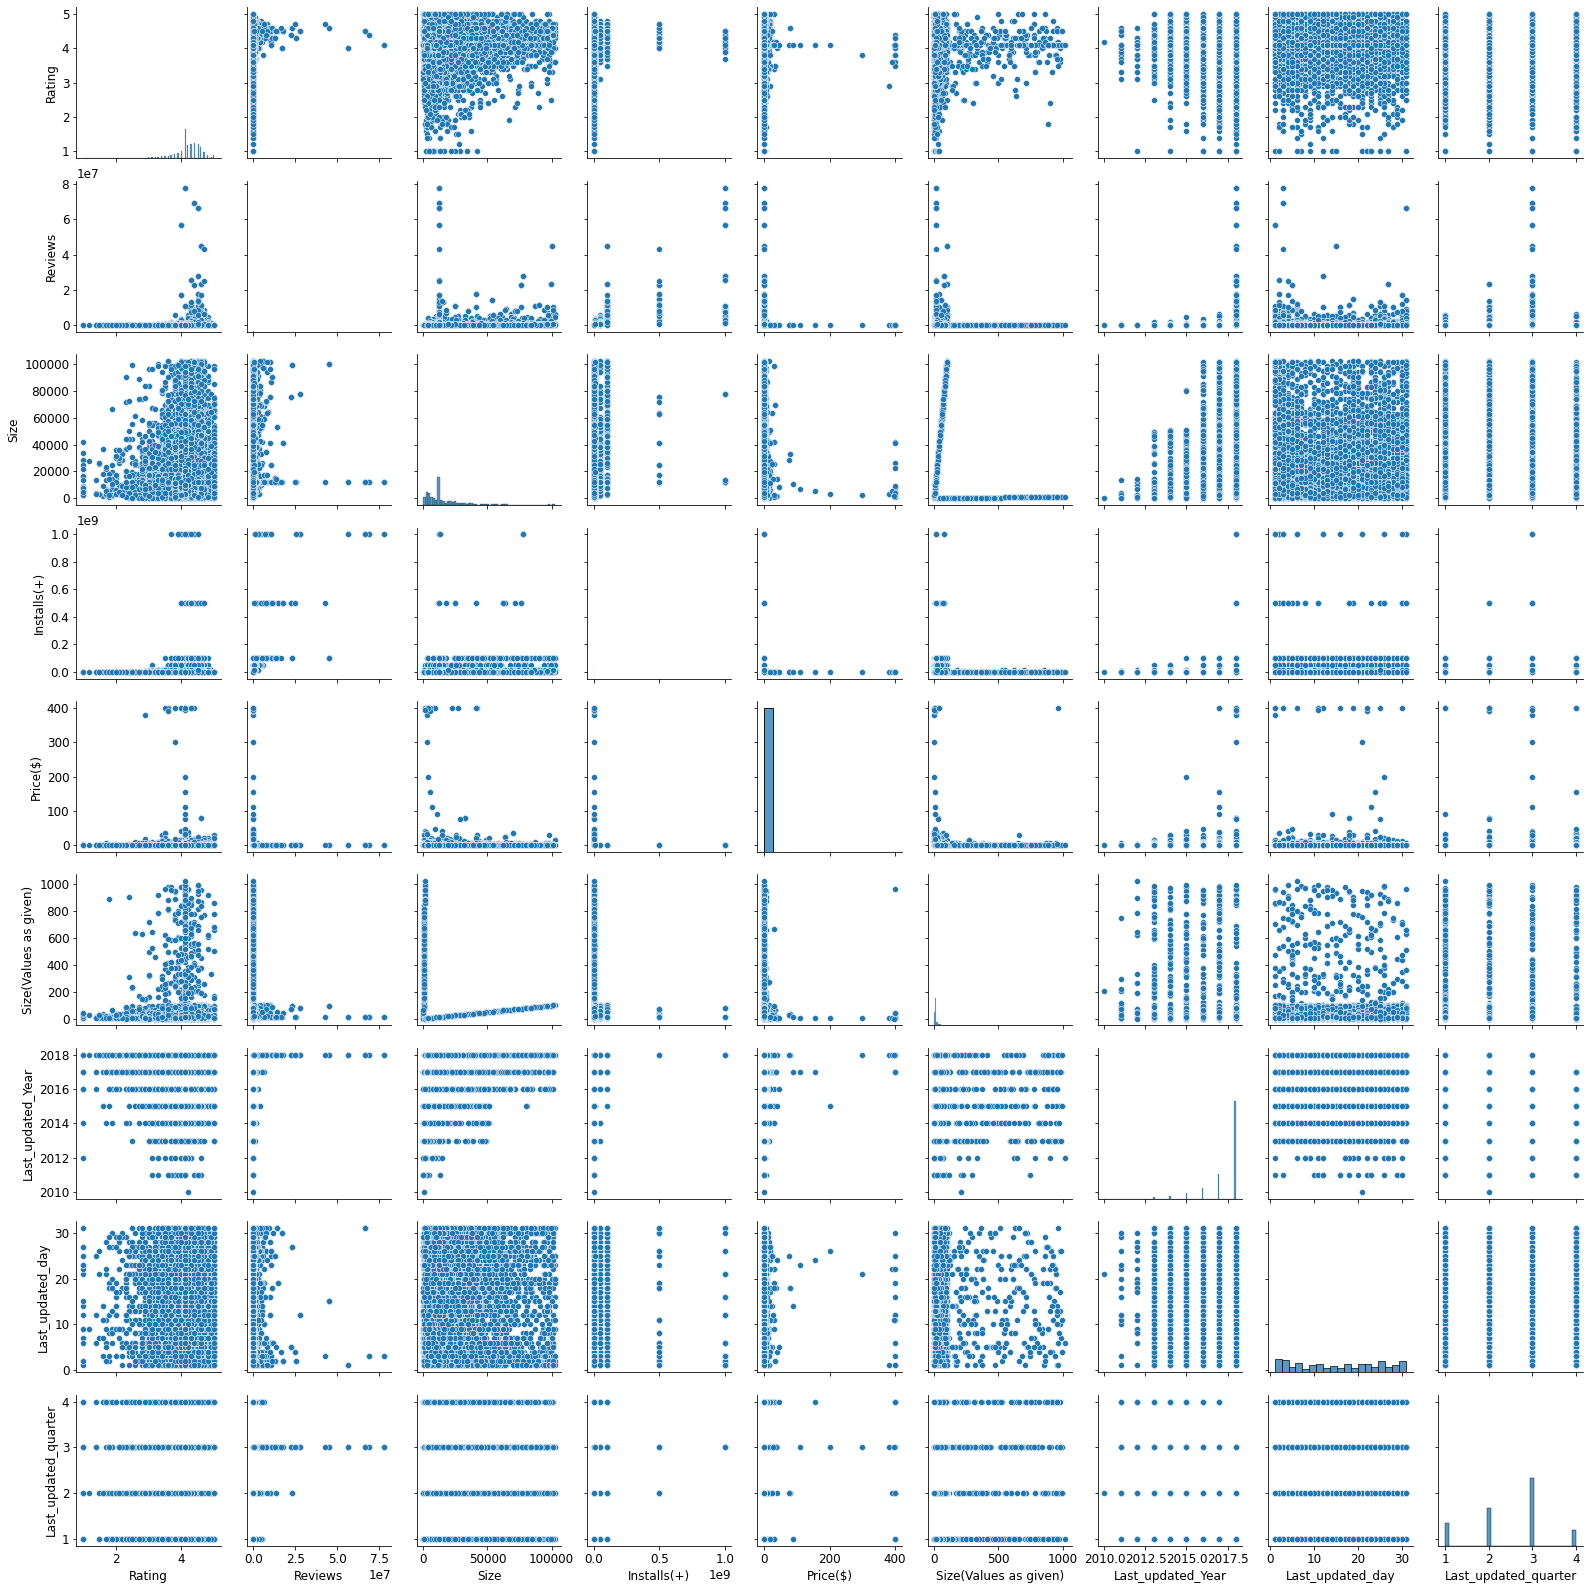

In [116]:
sns.pairplot(Store_df);

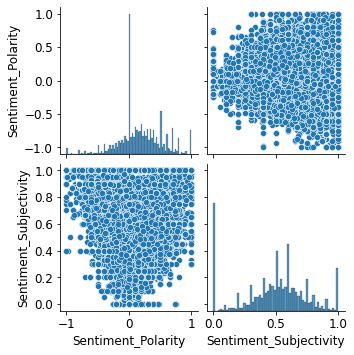

In [117]:
sns.pairplot(Users_df);

In [118]:
Store_df['Installs(+)'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int32)

In [123]:
# Small case study find out the apps which are rated more than 4.8, which comes under paid category, with 10000+ installs and also reviews are given for it.
case1=Store_df[(Store_df['Rating']>4.8)&(Store_df['Type']=='Paid')&(Store_df['Installs(+)']>=10000)&(Store_df['Reviews'].notnull())]

In [124]:
case1

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Current Ver,Android Ver,"Size(MB,KB)",Size(Values as given),Last_updated_month,Last_updated_Year,Last_updated_day,Last_updated_quarter
1833,The Room: Old Sins,Game,4.9,21119,49152.0,100000,Paid,4.99,Everyone,Puzzle,1.0.1,4.4 and up,MB,48.0,Apr,2018,18,2


- So there is only one such row in the data which satisfy the given conditions and may be there are more free apps with such conditions.

In [125]:
# Another case where there are more number of installations with more than 10,00,000 , with ratings greater than 4.8, reviews >50000 and size < 25000 KB
case2=Store_df[(Store_df['Rating']>4.8)&(Store_df['Size']<=25000)&(Store_df['Installs(+)']>=1000000)&(Store_df['Reviews']>50000)]

In [126]:
case2

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price($),Content Rating,Genres,Current Ver,Android Ver,"Size(MB,KB)",Size(Values as given),Last_updated_month,Last_updated_Year,Last_updated_day,Last_updated_quarter
1260,Six Pack in 30 Days - Abs Workout,Health_and_fitness,4.9,272337,13312.0,10000000,Free,0.0,Everyone,Health & Fitness,1.0.2,4.2 and up,MB,13.0,Jun,2018,21,2
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,Health_and_fitness,4.9,66791,10240.0,1000000,Free,0.0,Everyone,Health & Fitness,Varies with device,Varies with device,MB,10.0,July,2018,30,3
2344,Period Tracker,Medical,4.9,100082,3788.8,1000000,Free,0.0,Everyone,Medical,1.2.2,4.1 and up,MB,3.7,July,2018,9,3
4854,Six Pack in 30 Days - Abs Workout,Health_and_fitness,4.9,272172,13312.0,10000000,Free,0.0,Everyone,Health & Fitness,1.0.2,4.2 and up,MB,13.0,Jun,2018,21,2
7000,PixPanda - Color by Number Pixel Art Coloring ...,Family,4.9,55723,14336.0,1000000,Free,0.0,Everyone,Entertainment,3.3,4.0.3 and up,MB,14.0,Jun,2018,4,2
9625,JW Library,Books_and_reference,4.9,922752,11776.0,10000000,Free,0.0,Everyone,Books & Reference,Varies with device,Varies with device,Varies with device,11.5,Jun,2018,15,2


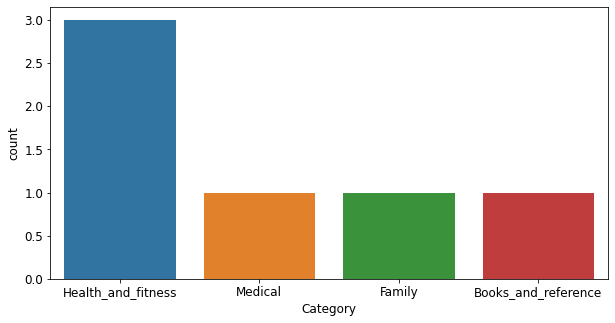

In [127]:
sns.countplot(x='Category',data=case2)

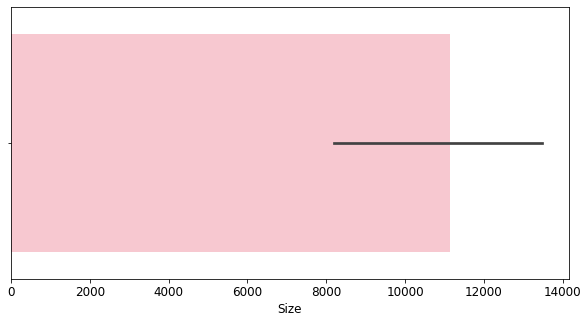

In [145]:
sns.barplot(x='Size',data=case2,color='pink')

- There are 6 such rows which satisfy the given conditions and they are of different categories and genres.

## **Conclusion:**
- The features in Play store data that mostly helps in **predicting the success rate of an app are the Rating, reviews, Installs and type of an app.**
- The features in Users review dataset that would help in the success rate or by which it can be said **that the app is successful or not. They are firstly Sentiment is useful then Sentiment polarity and subjectivity.**
- From the analysis it is seen that there are good number of apps with positive reviews than negative and neutral reviews.
- There are many categories of apps present in the play store and **the apps that are high in particular category is Communication and Social apps. It says these apps are more successful and have high app engagement.** "Yes, Everyone uses communication apps for talking with others than calls and Social apps for sharing the things and also knowing different kind of things happening around us."
- There are more **apps in the Play store than that are given reviews by the users. There are more ratings given to an app than the reviews.** "Yes, I do that and how many does it? Many!It's a choice."
- There are more updates happening in third quarter then second quarter and few of them in first and fourth quarter. The last updated quarter for android apps in the play store happened more in third quarter with 5071 apps and next second with 2867 apps, first and fourth are 1692,1211 respectively.
- Mostly the updates happened in the Month of July, August and June in the descending order of the updates happened for apps with 3163, 1594 and 1273 respectively. **So, may be most of the updated versions are released in these months and quarters which increases the success rate of an app with slight improvements provided to it.**
- Also **there is an increasing trend that can be observed from 2010 to 2018, the users who have rated the apps have increased. So the success rate of the apps has also grown.** "Definitely, even now the people who are using the android apps is also high in number because digitalization and technological developments".


----
----